In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from numpy import interp
from scipy.optimize import curve_fit
import PyMieScatt as ps

from infra import *
from functions import *

---

carbon dust

In [ ]:
carbon_dust = read_csv_skip_last_lines(Path('files/carbon dust - raw data.RI'))
carbon_dust['wavelenght'] = carbon_dust['wavelenght'].to_numpy() * 1e-2
carbon_dust.to_csv('files/carbon_dust.csv', index=None)

ice dust

In [ ]:
ice_dust = read_csv_skip_last_lines(Path('files/ice dust - raw data.RI'))
ice_dust['wavelenght'] = ice_dust['wavelenght'].to_numpy() * 1e-6
ice_dust.to_csv('files/ice_dust.csv', index=None)

silicate dust

In [ ]:
silicate_dust = read_csv_skip_last_lines(Path('files/silicate dust - raw data.RI'))
silicate_dust['n'] = silicate_dust['n'].to_numpy() + 1
silicate_dust['wavelenght'] = silicate_dust['wavelenght'].to_numpy() * 1e-6
silicate_dust.to_csv('files/silicate_dust.csv', index=None)

---

In [ ]:
plot_nk('files/carbon_dust.csv')

In [ ]:
plot_nk('files/ice_dust.csv')

In [ ]:
plot_nk('files/silicate_dust.csv')

---

In [ ]:
ice_dust = pd.read_csv('files/ice_dust.csv')

In [ ]:
first = 20
wl_first = ice_dust.head(first)['wavelenght'].to_numpy()
n_10 = ice_dust.head(first)['n'].to_numpy()
k_10 = ice_dust.head(first)['k'].to_numpy()
plt.plot(wl_first, n_10, c='blue', label='n')
plt.plot(wl_first, k_10, c='green', label='k')

ab, _ = curve_fit((lambda x, a, b: a*np.log(x)+b), wl_first, k_10)
n_approx = np.log(wl_first) * ab[0] + ab[1]
plt.plot(wl_first, n_approx, c='red', ls=':')

plt.legend()

In [ ]:
wl = np.arange(start=1e-8, stop=2e-7, step=6e-8)
n_approx = np.log(wl) * ab[0] + ab[1]
plt.plot(wl, n_approx, c='red', ls=':')

wl_x = ice_dust['wavelenght'].to_numpy()
n_x = ice_dust['n'].to_numpy()
k_x = ice_dust['k'].to_numpy()
plt.plot(wl_x, n_x, c='blue')
plt.plot(wl_x, k_x, c='green')

plt.xscale('log')

In [ ]:
# log(x) * ab[0] + ab[1] = 0
# x = exp(- ab[1] / ab[0])
print(ab)
print(np.exp(-ab[1] / ab[0]))

ice_dust.csv -- add a row 

wavelength = 3.6672289534720725e-08

n = line next one

k = 0

---

In [2]:
silicate_dust = pd.read_csv('files/silicate_dust.csv')
carbon_dust = pd.read_csv('files/carbon_dust.csv')
ice_dust = pd.read_csv('files/ice_dust.csv')

/home/denis/Desktop/labs_2024/lab_2/functions.py:52: RuntimeWarning: overflow encountered in exp
  intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )


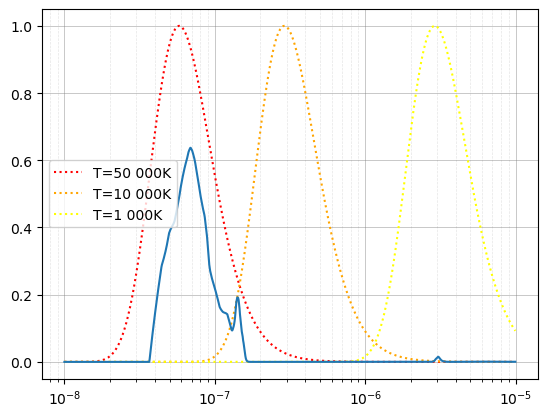

In [3]:
silicate_dust = pd.read_csv('files/silicate_dust.csv')
wl_metr = 10.0 ** np.arange(start=-8, stop=-5, step=0.003)
q_pr = vectorized_Qpr(ice_dust, wl_metr, 100)

plt.plot(wl_metr, planck_shorten(wl_metr, 50000), 
         c='red', ls=':', label='T=50 000K')
plt.plot(wl_metr, planck_shorten(wl_metr, 10000),
         c='orange', ls=':', label='T=10 000K')
plt.plot(wl_metr, planck_shorten(wl_metr, 1000),
         c='yellow', ls=':', label='T=1 000K')
plt.plot(wl_metr, q_pr)

plt.xscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)
plt.legend()

---

In [22]:
temperatures = np.arange(start=1000, stop=50001, step=500)
diameter = 200

q_pr_s = vectorized_Qpr_tilda(carbon_dust, diameter, temperatures)
q_pr_c = vectorized_Qpr_tilda(ice_dust, diameter, temperatures)
q_pr_i = vectorized_Qpr_tilda(silicate_dust, diameter, temperatures)

/home/denis/Desktop/labs_2024/lab_2/functions.py:52: RuntimeWarning: overflow encountered in exp
  intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )


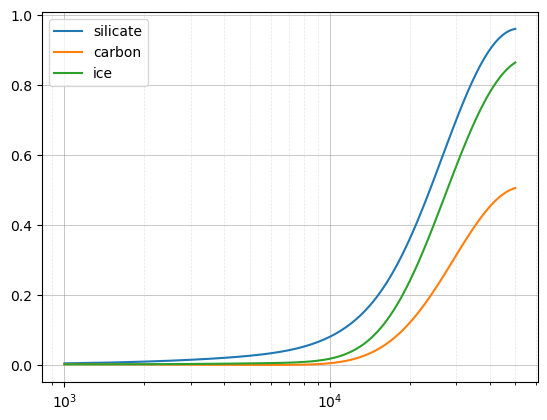

In [23]:
plt.plot(temperatures, q_pr_s, label='silicate')
plt.plot(temperatures, q_pr_c, label='carbon')
plt.plot(temperatures, q_pr_i, label='ice')

plt.xscale('log')
# plt.yscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)
plt.legend()

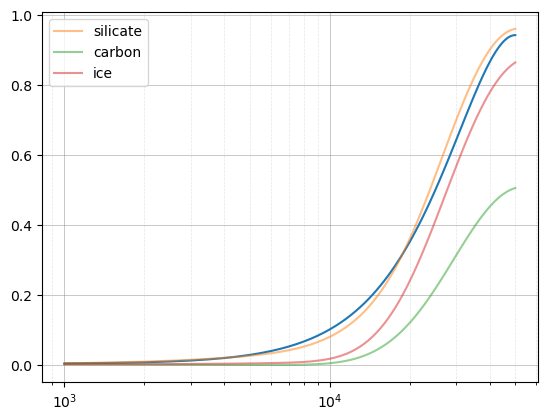

In [24]:
approx_si = lambda x: 3.5e-3 + (x)**2 / 9.8e8 * np.exp(- x**2 / 2.5e9)

plt.plot(temperatures, approx_si(temperatures))

plt.plot(temperatures, q_pr_s, alpha=0.5, label='silicate')
plt.plot(temperatures, q_pr_c, alpha=0.5, label='carbon')
plt.plot(temperatures, q_pr_i, alpha=0.5, label='ice')

plt.xscale('log')
# plt.yscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)
plt.legend()

---

Поглощение и рассеяние света малыми частицами -- Борен Хафмен

гл. 4 - 153 стр

искать параметр ассиметрии

---

In [27]:
def beta(dust_nk, star_prop, a, rho) -> float:
    t, r, m = star_prop
    q = vectorized_Qpr_tilda(dust_nk, 2*a, t)
    return 2.12e-8 * (r*7e8)**2 * t**4 / (m*2e30) * q / (a*1e-9 * rho)

# case "si":
#     rho = 3.4
# case "ac":
#     rho = 2.2
# case "ice":
#     rho = 0.9

In [45]:
a = np.array([0.01, 0.1, 1, 10]) * 1000

beta(carbon_dust, stars_TRM('M', 'G'), a, 2.2)

array([0.59739512, 0.60959113, 1.19668939, 0.24649419])